In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [4]:
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
from foottraffic.bayes.media_transforms.adstock import delayed_adstock_weights

In [75]:
with pm.Model(coords=dict(weeks=-np.arange(12))) as model:
  alpha = pm.Beta('alpha', 0.3, 1)
  lag = pm.Uniform('uniform', 0, 3)
  weights = pm.Deterministic('adstock_weights', delayed_adstock_weights(alpha, lag), dims='weeks')


In [76]:
[alpha_samples, lag_samples, weights_samples] = pm.draw([alpha, lag, weights], draws=20)

In [77]:
np.mean(np.random.beta(.1, 1, 10_000))

0.09001656318510602

In [88]:
def plot_adstock_prior(alpha_samples, lag_samples, weights_samples):

  x = np.linspace(0, 12, 1000)
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  for (alpha_sample, lag_sample, weights_sample) in zip(alpha_samples, lag_samples, weights_samples):
    ax[0].bar(np.arange(12), weights_sample, alpha=.3, color='b')
  ax[0].set_title("Ad Stock Weights")
  ax[0].set_xlabel("Weeks From Activation")
  ax[0].set_ylabel("Weight")
  ax[0].set_xlim(0, 12)
  ax[0].set_ylim(0, 1)
  for (alpha_sample, lag_sample, weights_sample) in zip(alpha_samples, lag_samples, weights_samples):
    ax[1].plot(x, alpha_sample**((x-np.round(lag_sample))**2), alpha=.3, color='b')
    ax[1].axvline(np.round(lag_sample), color='k', ls='--', alpha=.3)
  ax[1].set_title("Ad Stock Envolope")
  ax[1].set_xlabel("Weeks From Activation")
  ax[1].set_ylabel("Un-Normalized Weight")
  ax[1].set_xlim(0, 12)
  ax[1].set_ylim(0, 1)
  return fig, ax

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Ad Stock Weights'}, xlabel='Weeks From Activation', ylabel='Weight'>,
        <Axes: title={'center': 'Ad Stock Envolope'}, xlabel='Weeks From Activation', ylabel='Un-Normalized Weight'>],
       dtype=object))

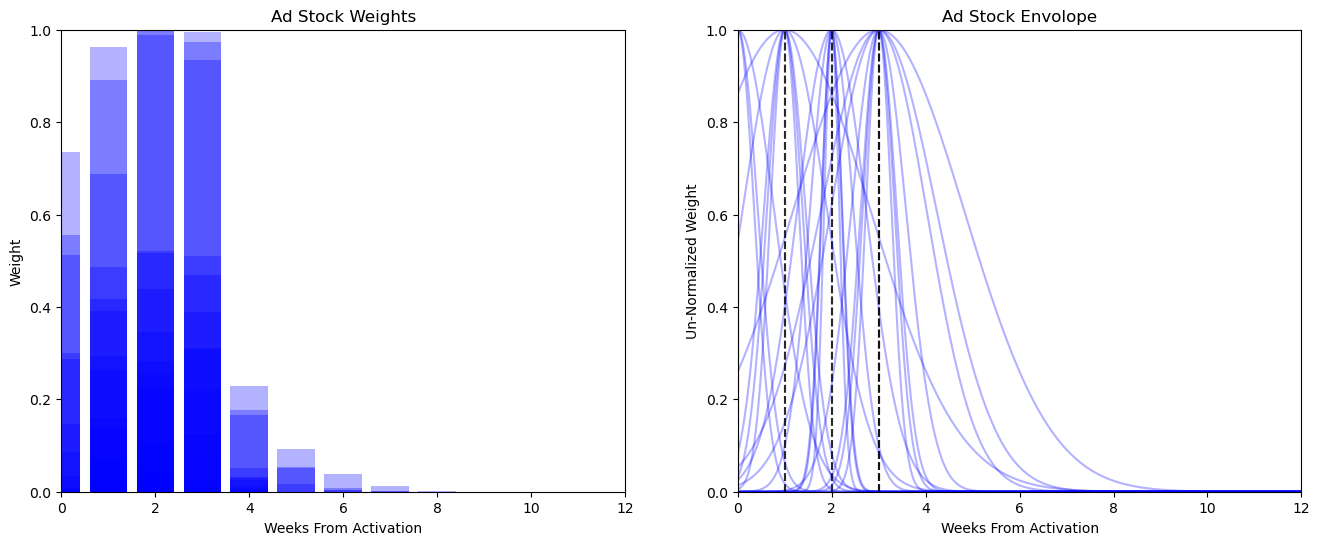

In [89]:
plot_adstock_prior(alpha_samples, lag_samples, weights_samples)

In [49]:
data = {
  'Period': pd.date_range('2020-01-01', periods=156, freq="W-MON"),
  'Sales': np.random.gamma(4, 100, 156)
}
df = pd.DataFrame(data=data)


In [16]:
all(df['Period'].dt.day_name() == "Monday")

True

In [17]:
df['Period'].iloc[0].day_name()

'Monday'